### Preprocessing Steps:

To ensure that our data analysis yields accurate and meaningful insights, it was necessary to perform several preprocessing steps on the dataset. These steps focused on cleaning and organizing the **Close** column to address common data quality issues. Specifically, we needed to remove outliers, impute missing values, and sort the data based on their dates.

Outliers in the **Close** column can skew analysis and misrepresent trends, so we identified and removed them using the Interquartile Range (IQR). Missing values were addressed through imputation, using forward and backward fill methods to ensure continuity in the data. Additionally, sorting the data chronologically by the **Date** column was essential for time-series analysis, allowing us to identify trends and patterns over time.

By applying these preprocessing steps, we created a clean, well-structured dataset that enables better insights and more reliable visualizations in subsequent plots.

In [1]:
# Preprocessing steps for "Close" column

import os
import pandas as pd
import numpy as np

# Step 1: Specify the folder containing the CSV files
folder_path = "Team_3"  

# Initialize a dictionary to hold the data for the DataFrame
data_dict = {}

# Step 2: Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    print(f"Analyzing file: {file_name}")
    
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Remove duplicate rows based on the 'Date' column, keeping the first occurrence
    data = data.drop_duplicates(subset='Date', keep='first')

    # Sort the dataset by the 'Date' column
    if 'Date' in data.columns:
        # Convert 'Date' column to datetime format if not already
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
        data = data.sort_values(by='Date').reset_index(drop=True)

    # Calculate Q1 and Q3 for "Close" column
    Q1 = data['Close'].quantile(0.25)
    Q3 = data['Close'].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Replace outliers in 'Close' column with NaN
    data['Close'] = data['Close'].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

    # Impute missing values in 'Close' column using linear interpolation, then backward and forward fill
    data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

    # Add the cleaned dataset to the dictionary with the filename as the key
    data_dict[file_name] = data


Analyzing file: SBUX.csv
Analyzing file: DPZ.csv
Analyzing file: MCD.csv


/var/folders/32/c0g19nyd09l96_xtz_vvxk8r0000gn/T/ipykernel_67976/856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
/var/folders/32/c0g19nyd09l96_xtz_vvxk8r0000gn/T/ipykernel_67976/856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
/var/folders/32/c0g19nyd09l96_xtz_vvxk8r0000gn/T/ipykernel_67976/856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
/var/folders/32/c0g19nyd09l96_xtz_

Analyzing file: LKNCY.csv
Analyzing file: QSR.csv
Analyzing file: WEN.csv
Analyzing file: PZZA.csv
Analyzing file: YUM.csv


/var/folders/32/c0g19nyd09l96_xtz_vvxk8r0000gn/T/ipykernel_67976/856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


Analyzing file: BRK-A.csv
Analyzing file: DNUT.csv


/var/folders/32/c0g19nyd09l96_xtz_vvxk8r0000gn/T/ipykernel_67976/856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
/var/folders/32/c0g19nyd09l96_xtz_vvxk8r0000gn/T/ipykernel_67976/856490152.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


## Exercises:

1. For each dataset:
   - Print the number of rows and columns
   - Display the column names and their data types

In [2]:
# 1

# Iterate through the data in data_dict which is created after preprocessing steps
for file_name, data in data_dict.items():
    print(f"Analyzing file: {file_name}")
    
    # Print the number of rows and columns
    print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")
    
    # Display column names and their data types
    print("Column names and data types:")
    print(data.dtypes)
    print("-" * 40)

Analyzing file: SBUX.csv
Number of rows: 8117, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------------
Analyzing file: DPZ.csv
Number of rows: 5083, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------------
Analyzing file: MCD.csv
Number of rows: 14652, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: objec

2. Extract all rows where the date is in the year 2023. Print the number of rows and visualize the Close price trend for this period.

Processing file: SBUX.csv
Number of rows where the date is in 2023: 250


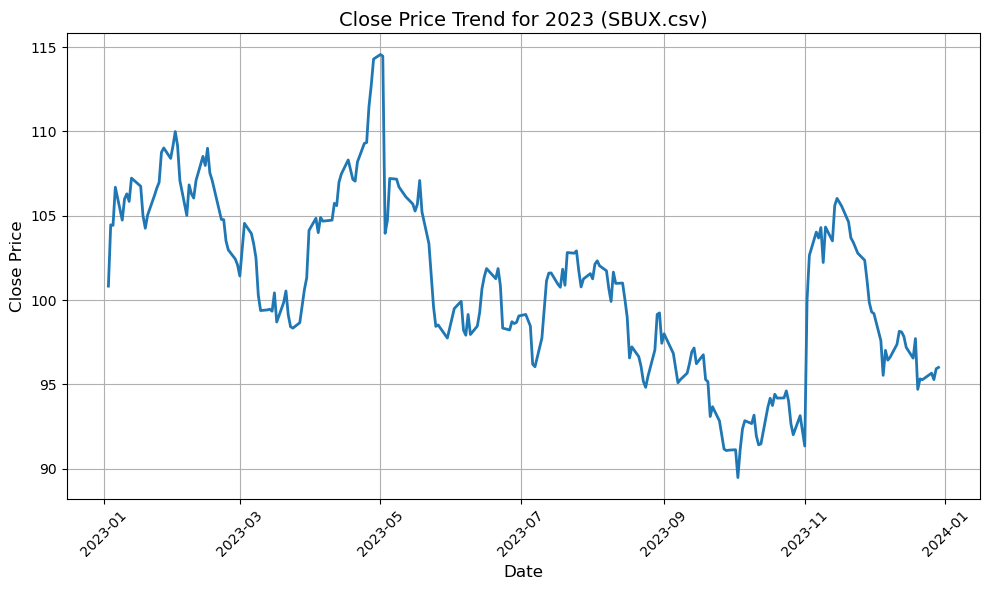

----------------------------------------
Processing file: DPZ.csv
Number of rows where the date is in 2023: 250


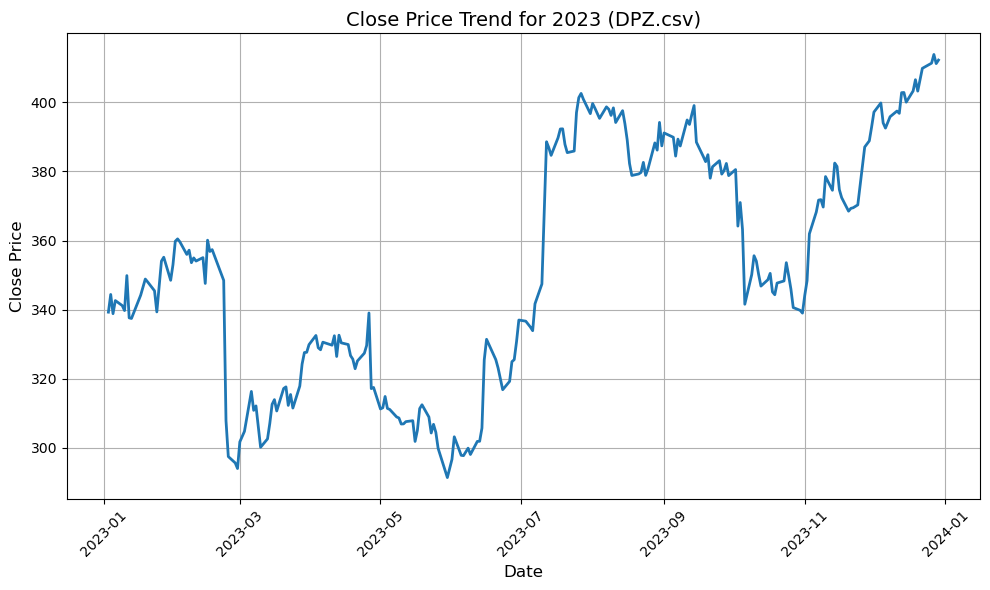

----------------------------------------
Processing file: MCD.csv
Number of rows where the date is in 2023: 250


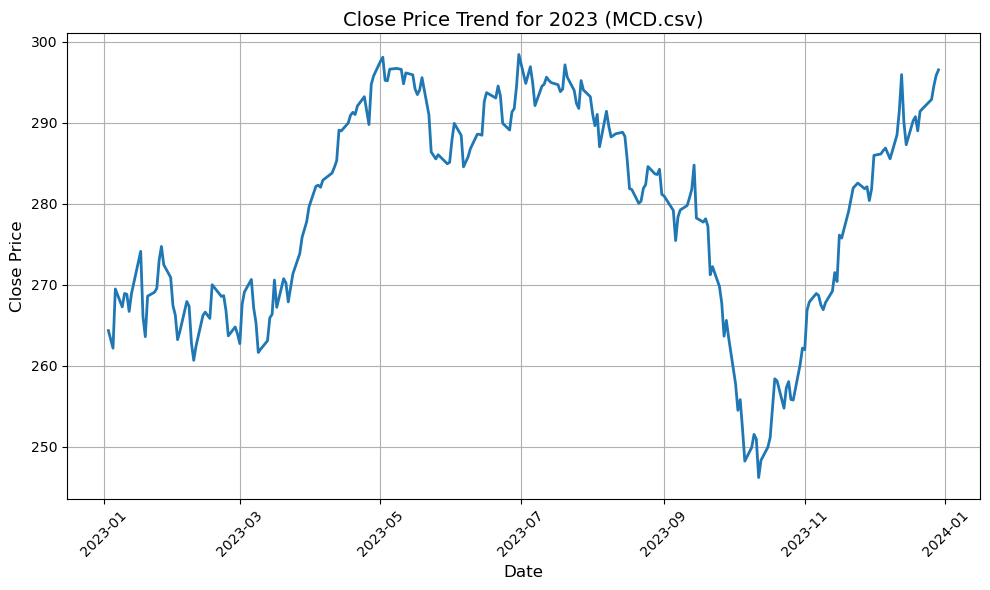

----------------------------------------
Processing file: LKNCY.csv
Number of rows where the date is in 2023: 250


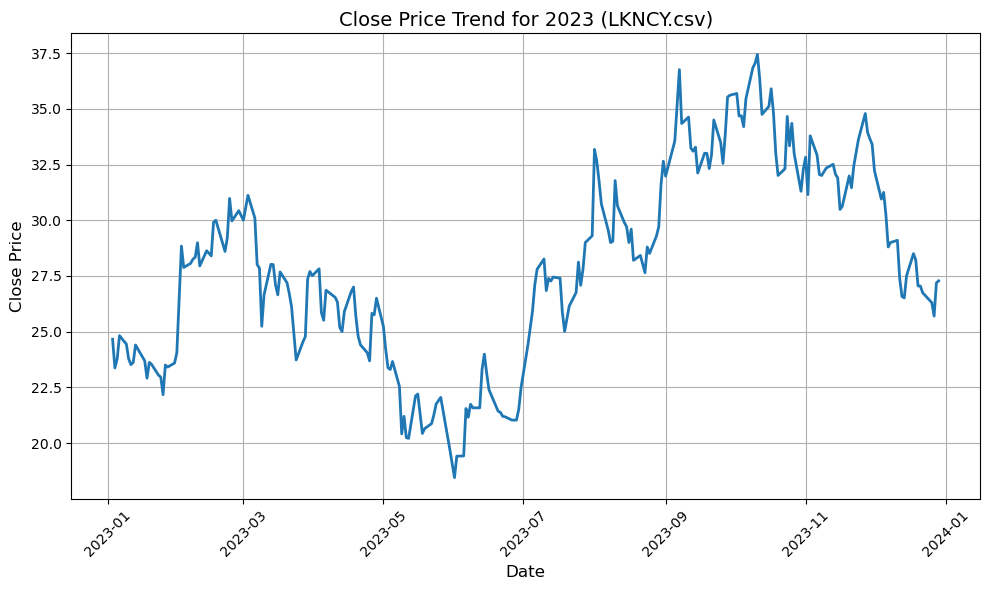

----------------------------------------
Processing file: QSR.csv
Number of rows where the date is in 2023: 250


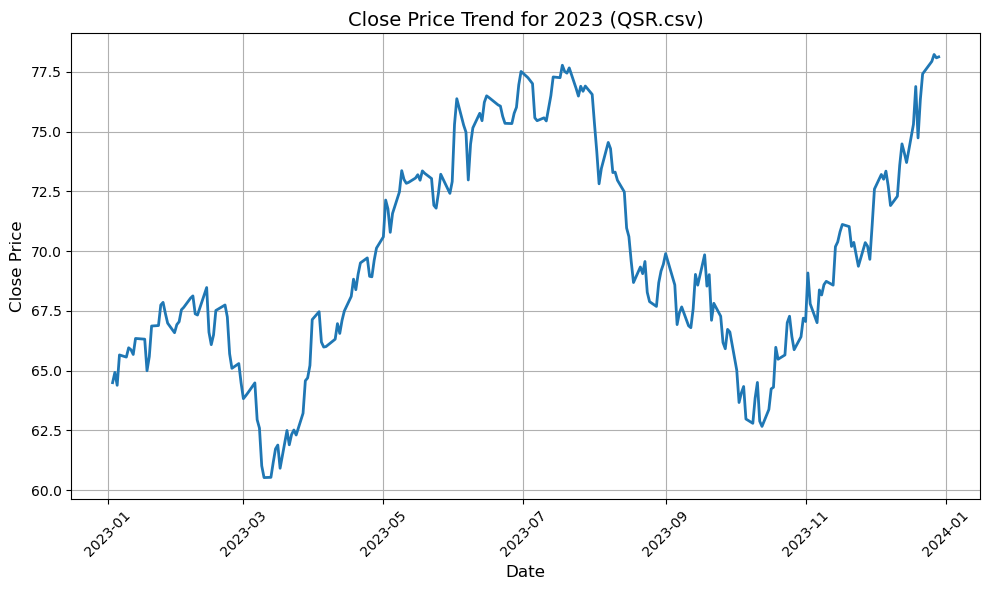

----------------------------------------
Processing file: WEN.csv
Number of rows where the date is in 2023: 250


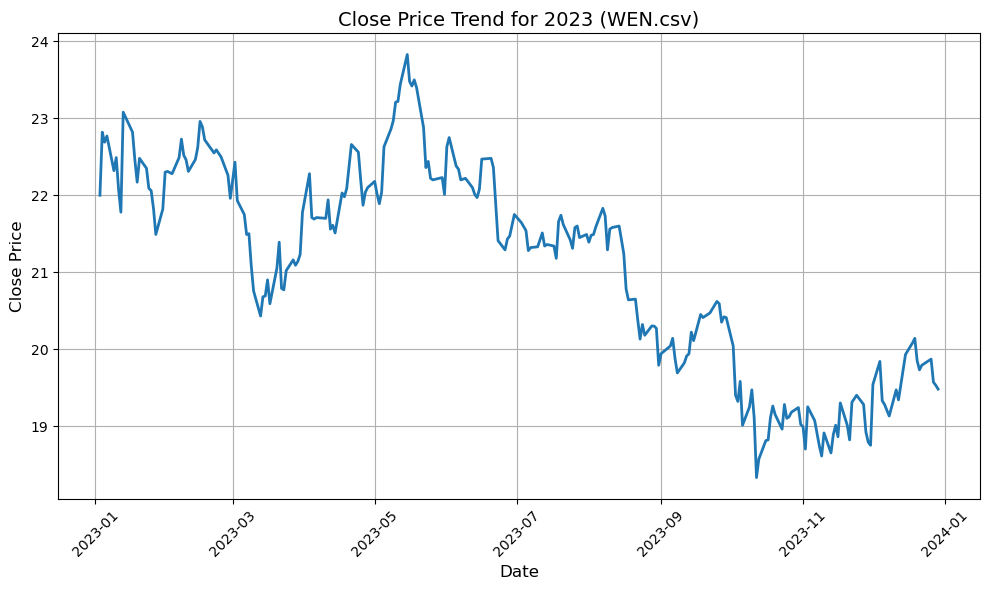

----------------------------------------
Processing file: PZZA.csv
Number of rows where the date is in 2023: 250


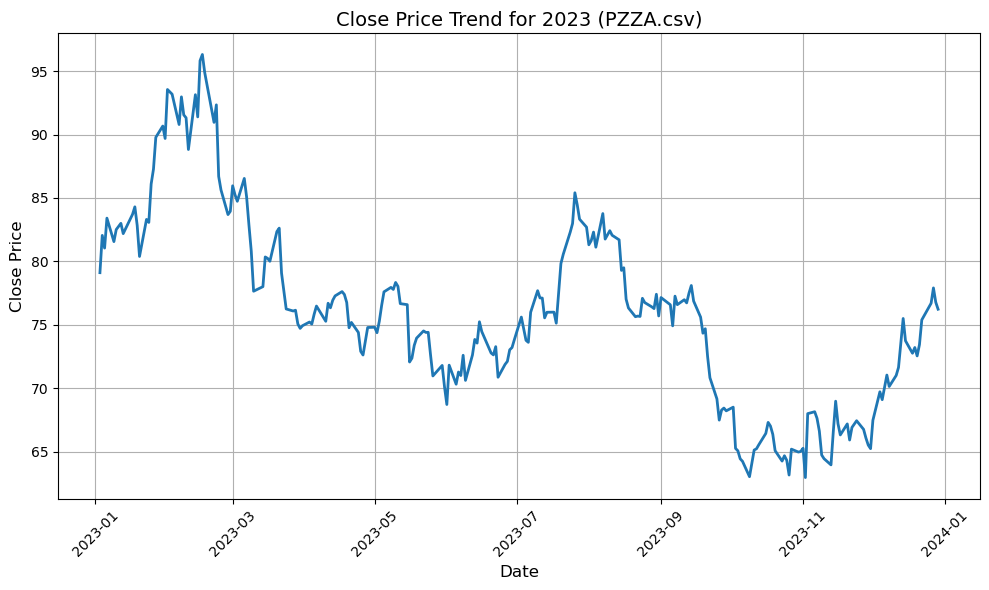

----------------------------------------
Processing file: YUM.csv
Number of rows where the date is in 2023: 250


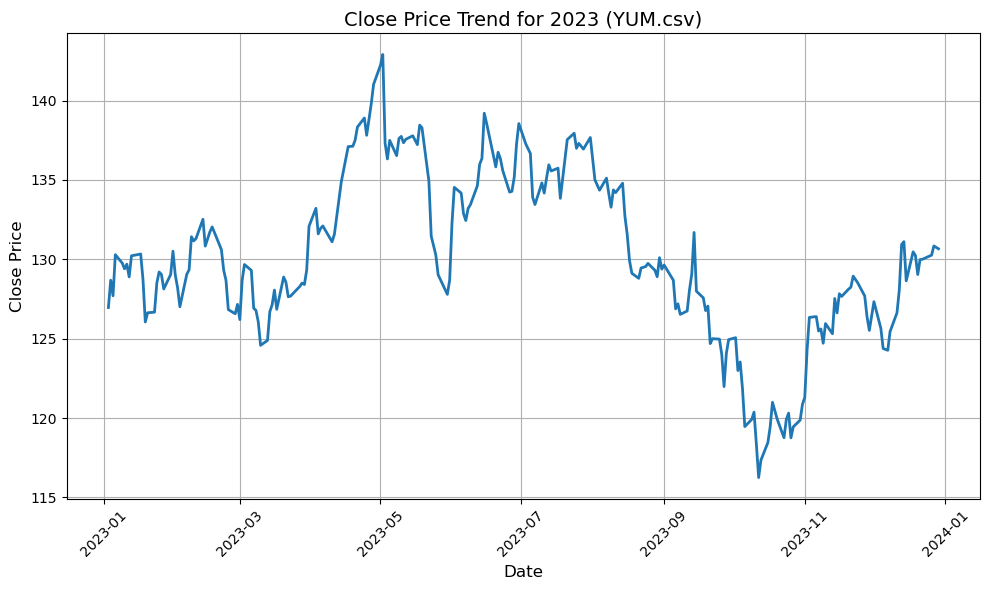

----------------------------------------
Processing file: BRK-A.csv
Number of rows where the date is in 2023: 250


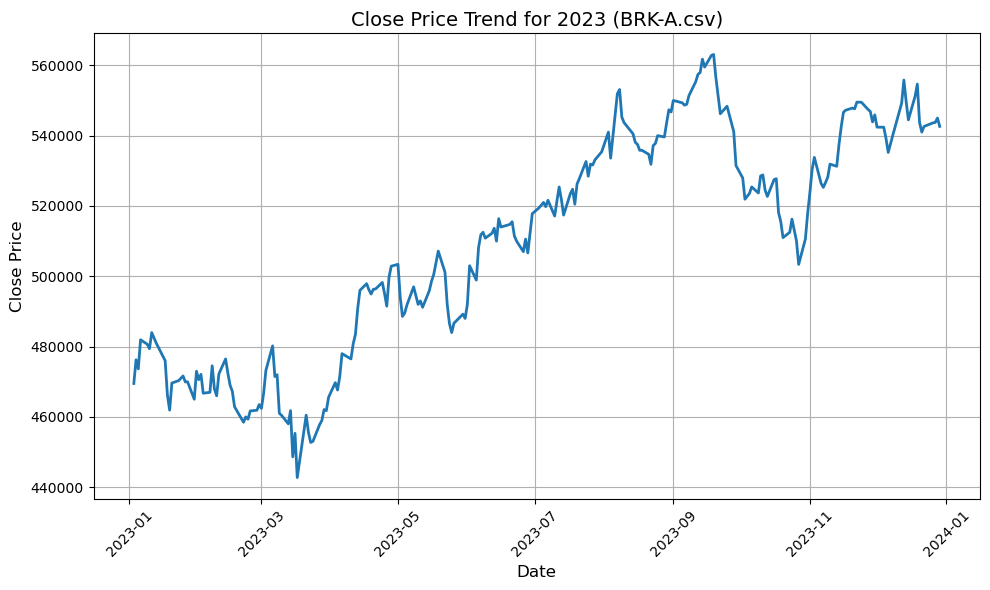

----------------------------------------
Processing file: DNUT.csv
Number of rows where the date is in 2023: 250


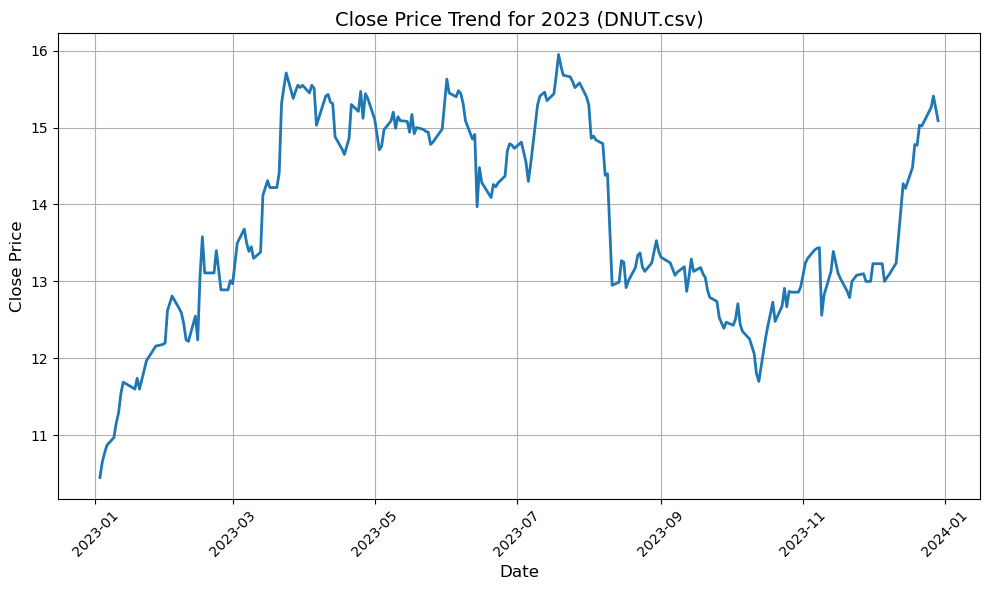

----------------------------------------


In [3]:
# 2

import matplotlib.pyplot as plt

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    print(f"Processing file: {file_name}")
    
    # Convert the Date column to datetime
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Handle potential parsing issues
    if data['Date'].isna().any():
        print(f"Warning: Some dates could not be parsed in {file_name}. Skipping invalid rows.")
        data = data.dropna(subset=['Date'])  # Drop rows where Date conversion failed

    # Filter rows for the year 2023
    data_2023 = data[data['Date'].dt.year == 2023]

    # Print the number of rows
    print(f"Number of rows where the date is in 2023: {data_2023.shape[0]}")

    # Visualize the Close price trend
    if not data_2023.empty:  # Check if there are rows for 2023
        plt.figure(figsize=(10, 6))
        plt.plot(data_2023['Date'], data_2023['Close'], linestyle='-', linewidth=2)  # Removed marker for a cleaner plot
        plt.title(f'Close Price Trend for 2023 ({file_name})', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Close Price', fontsize=12)
        plt.grid()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data for 2023 in {file_name}. Skipping visualization.")
    
    print("-" * 40)


3. For each company, find the day with the highest Close price and display it alongside the price.

In [4]:
# 3

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    print(f"Processing file: {file_name}")
    
    # Find the row with the highest Close price
    if not data.empty:
        max_close_row = data.loc[data['Close'].idxmax()]
        highest_date = max_close_row['Date']
        highest_price = max_close_row['Close']
        print(f"Highest Close price for {file_name}: {highest_price} on {highest_date}")
    else:
        print(f"No valid Close data in {file_name}.")
    
    print("-" * 40)


Processing file: SBUX.csv
Highest Close price for SBUX.csv: 126.05999755859376 on 2021-07-26 00:00:00
----------------------------------------
Processing file: DPZ.csv
Highest Close price for DPZ.csv: 564.3300170898438 on 2021-12-31 00:00:00
----------------------------------------
Processing file: MCD.csv
Highest Close price for MCD.csv: 300.5299987792969 on 2024-01-19 00:00:00
----------------------------------------
Processing file: LKNCY.csv
Highest Close price for LKNCY.csv: 50.02000045776367 on 2020-01-17 00:00:00
----------------------------------------
Processing file: QSR.csv
Highest Close price for QSR.csv: 82.75 on 2024-03-13 00:00:00
----------------------------------------
Processing file: WEN.csv
Highest Close price for WEN.csv: 32.0 on 1993-09-13 00:00:00
----------------------------------------
Processing file: PZZA.csv
Highest Close price for PZZA.csv: 140.00999450683594 on 2021-11-04 00:00:00
----------------------------------------
Processing file: YUM.csv
Highest Cl

4. Group the data by month and calculate the average Close price for each company. Plot these monthly
averages for 3 companies and compare them. Justify the chart selection.

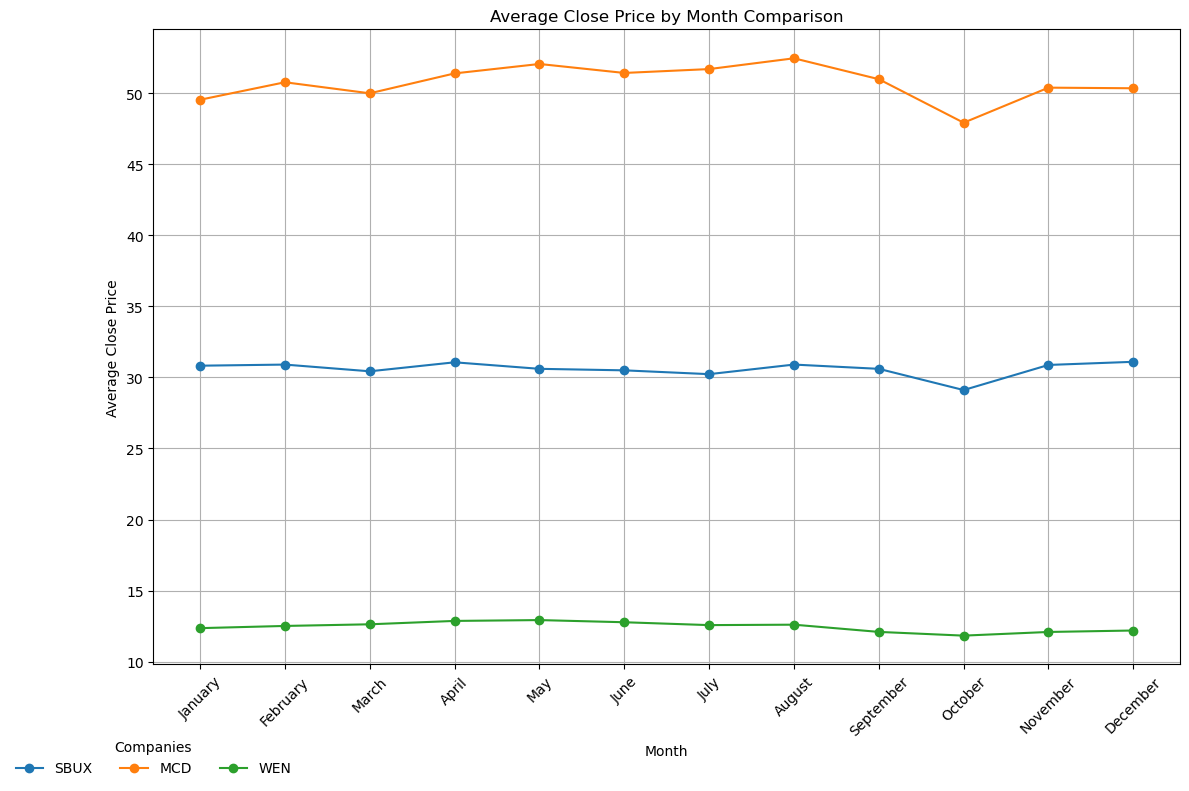

In [5]:
# 4

# Dictionary to store monthly average Close prices for selected companies
monthly_avg_data = {}

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():

    # Extract month and calculate average Close price across all years
    data['Month'] = data['Date'].dt.month  # Extract month as an integer
    monthly_avg = data.groupby('Month')['Close'].mean().reset_index()
    monthly_avg_data[file_name] = monthly_avg  # Store the data

#Plot these monthly averages for 3 companies and compare them. 
three_chosen_companies= ['SBUX.csv', 'MCD.csv', 'WEN.csv']

plt.figure(figsize=(12, 8))

# Month labels for the x-axis
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the monthly average Close prices for the selected companies
for company in three_chosen_companies:
    monthly_avg = monthly_avg_data[company]
    label = company.replace('.csv', '')  # Remove the .csv extension for readability
    plt.plot(monthly_avg['Month'], monthly_avg['Close'], marker='o', linestyle='-', label=label)

# Chart details
plt.title('Average Close Price by Month Comparison')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(ticks=range(1, 13), labels=month_labels, rotation=45)  # Set the labels for the months
plt.legend(title="Companies", loc='upper center', bbox_to_anchor=(0.0, -0.1), ncol=3, frameon=False)
plt.grid()
plt.tight_layout()
plt.show()


Justify the chart selection: A line chart is suitable for comparing trends over time for multiple datasets.
It allows us to clearly observe differences and similarities in monthly average trends across companies.

5. For each company:
• Compute the yearly average of the Close price
• Plot a comparison of yearly averages for all companies on a chart. Justify your chart selection

Yearly Average Close Prices for SBUX:
    Year       Close
0   1992    0.465269
1   1993    0.702369
2   1994    0.813826
3   1995    1.044953
4   1996    1.710200
5   1997    2.198624
6   1998    2.695987
7   1999    3.466975
8   2000    4.693980
9   2001    4.927280
10  2002    5.566925
11  2003    6.640179
12  2004   11.056791
13  2005   13.397887
14  2006   17.626574
15  2007   14.119233
16  2008    7.612866
17  2009    7.864663
18  2010   13.078601
19  2011   18.934663
20  2012   25.625490
21  2013   33.715288
22  2014   37.780754
23  2015   53.250972
24  2016   56.591190
25  2017   57.256375
26  2018   57.496514
27  2019   81.430793
28  2020   82.835771
29  2021  112.020556
30  2022   87.636454
31  2023  100.834480
32  2024   86.285635
----------------------------------------
Yearly Average Close Prices for DPZ:
    Year       Close
0   2004   15.618306
1   2005   21.365119
2   2006   25.652072
3   2007   21.715179
4   2008   11.032510
5   2009    7.671865
6   2010   13.421310
7 

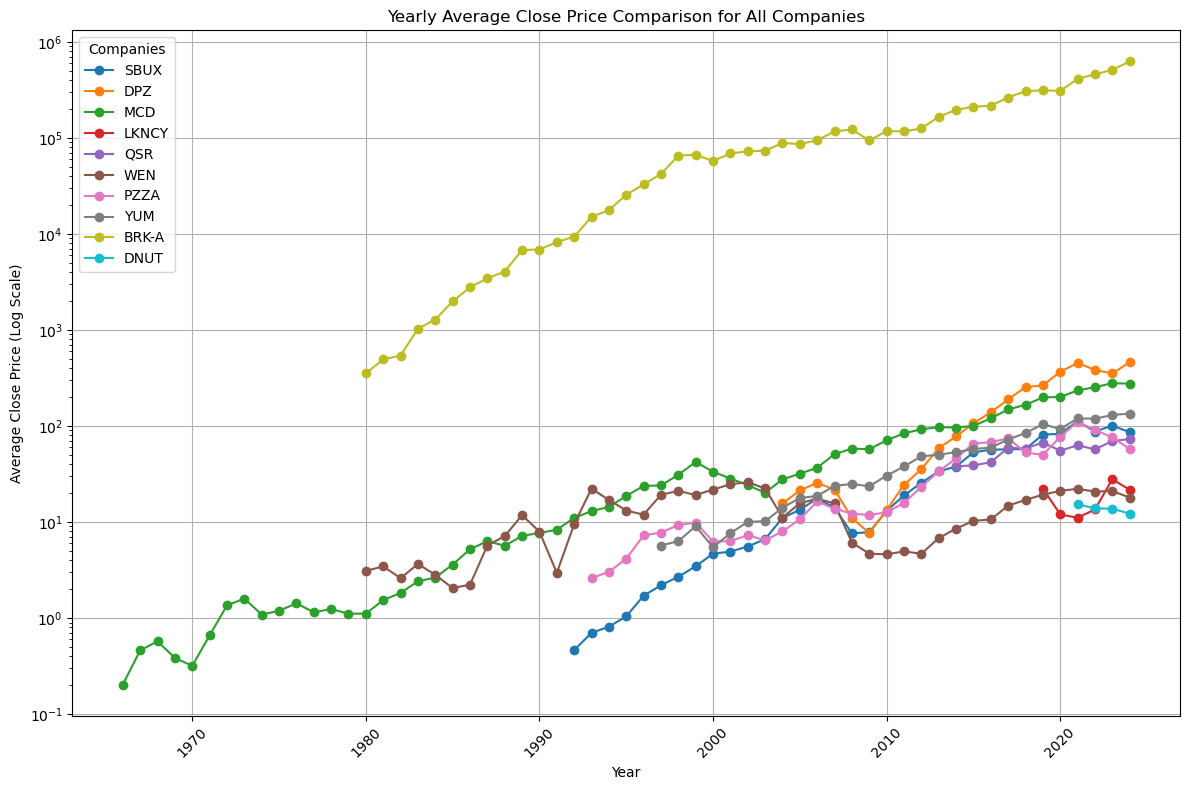

In [6]:
# 5

# Dictionary to store yearly average Close prices for each company
yearly_avg_data = {}

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    
    # Extract year and calculate average Close price for each year
    data['Year'] = data['Date'].dt.year  # Extract the year
    yearly_avg = data.groupby('Year')['Close'].mean().reset_index()
    company_name = file_name.replace('.csv', '')  # Use the file name without extension as the company name
    yearly_avg_data[company_name] = yearly_avg  # Store the data

    # Print the yearly average Close prices for the company
    print(f"Yearly Average Close Prices for {company_name}:")
    print(yearly_avg)
    print("-" * 40)

# Prepare data for plotting
plt.figure(figsize=(12, 8))

# Plot the yearly average Close prices for all companies
for company, yearly_avg in yearly_avg_data.items():
    plt.plot(yearly_avg['Year'], yearly_avg['Close'], marker='o', linestyle='-', label=company)

# Chart details
plt.title('Yearly Average Close Price Comparison for All Companies')
plt.xlabel('Year')
plt.ylabel('Average Close Price (Log Scale)')
#using logarithmic y-scale to compress large values and better visualize smaller ones
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title="Companies")
plt.grid()
plt.tight_layout()
plt.show()


Justify your chart selection: A line chart is the best option here because it is easy to compare changes in yearly averages Close prices and also compare trends for different companies over time.

6. For each company create a plot showing the range of prices for each month and justify the chart
selection.

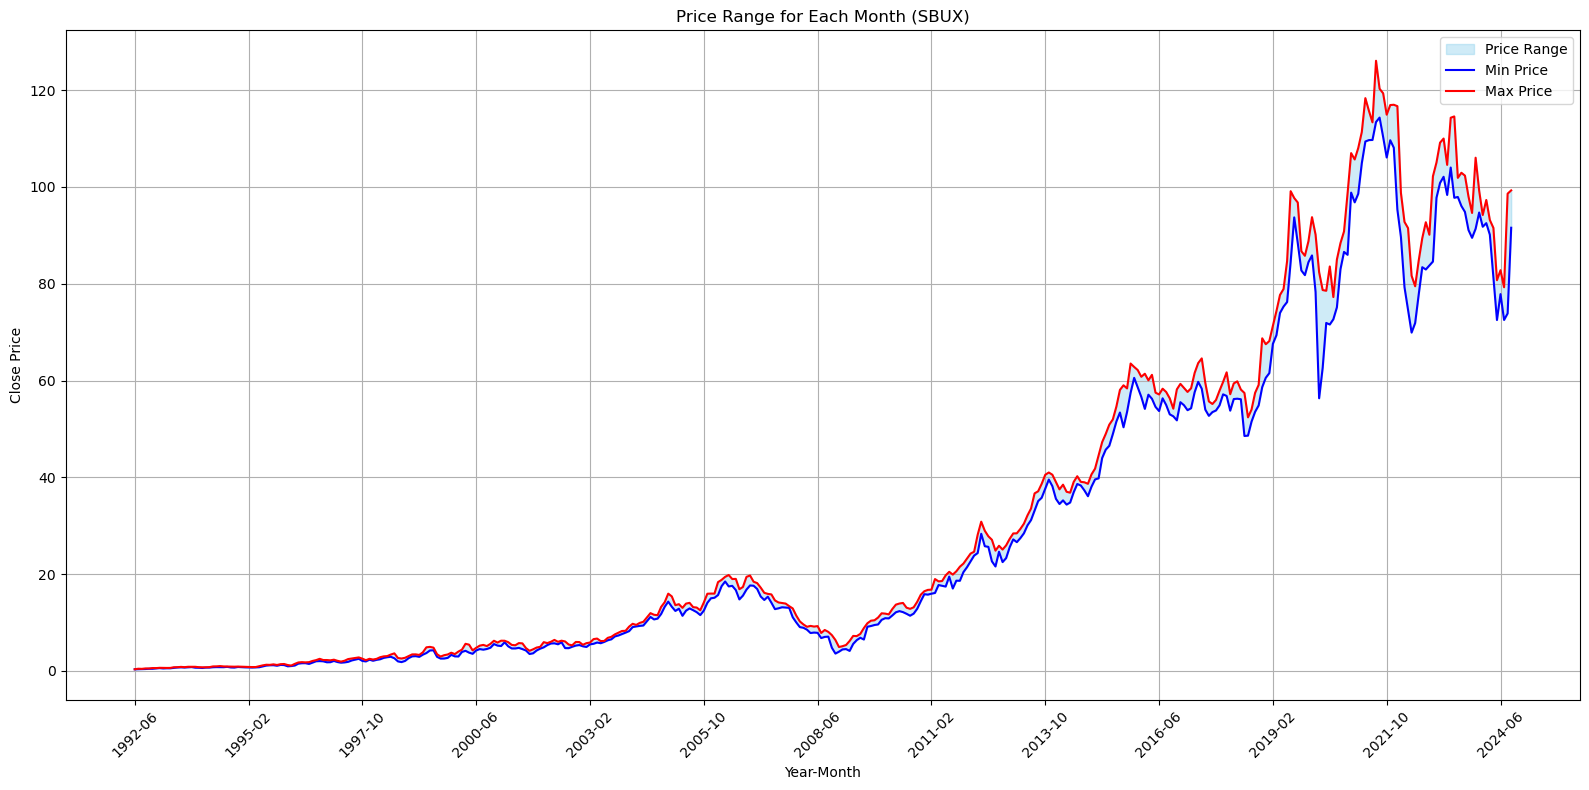

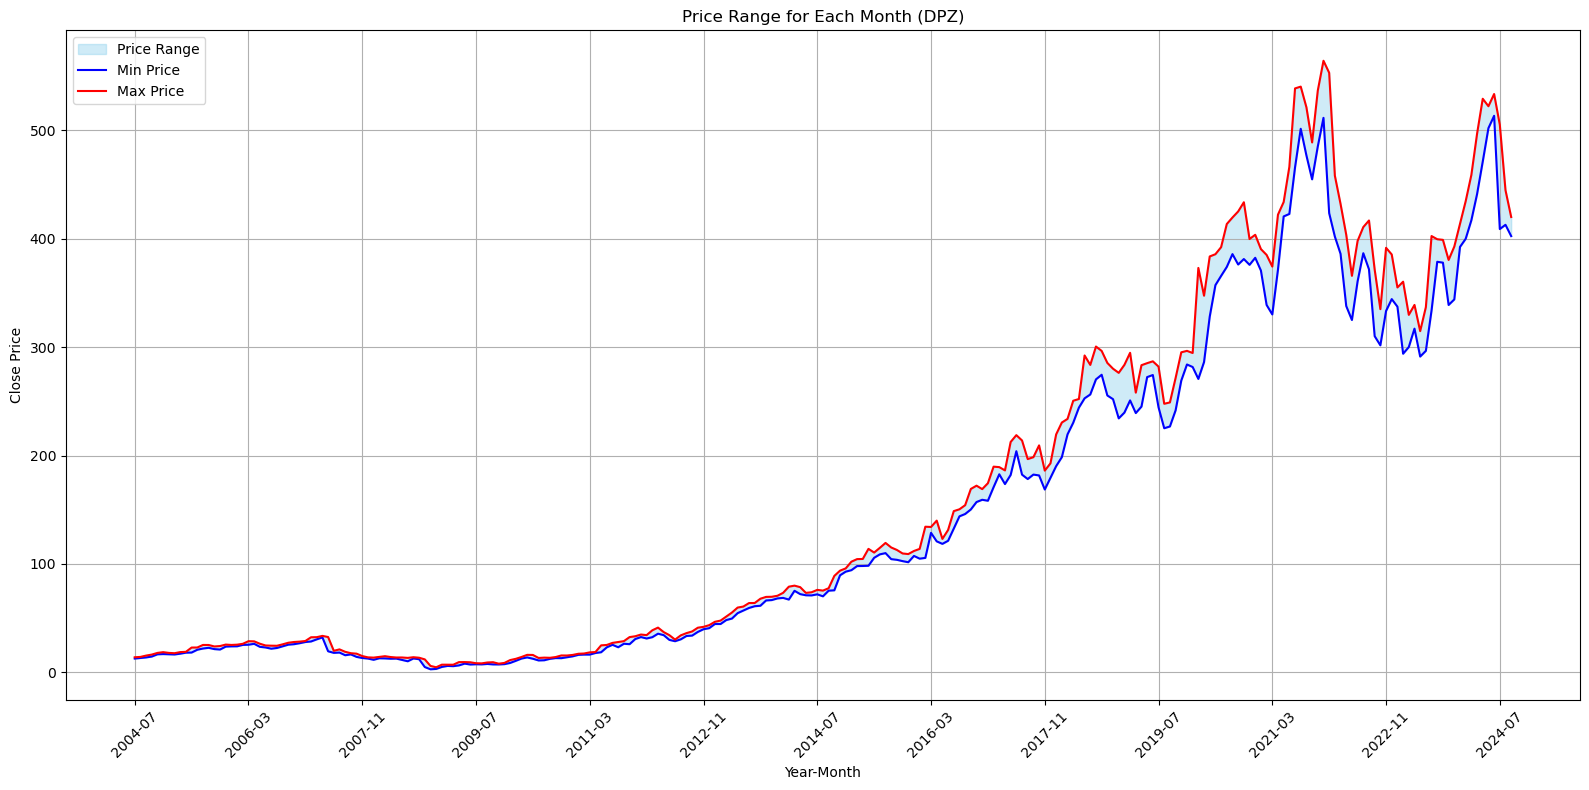

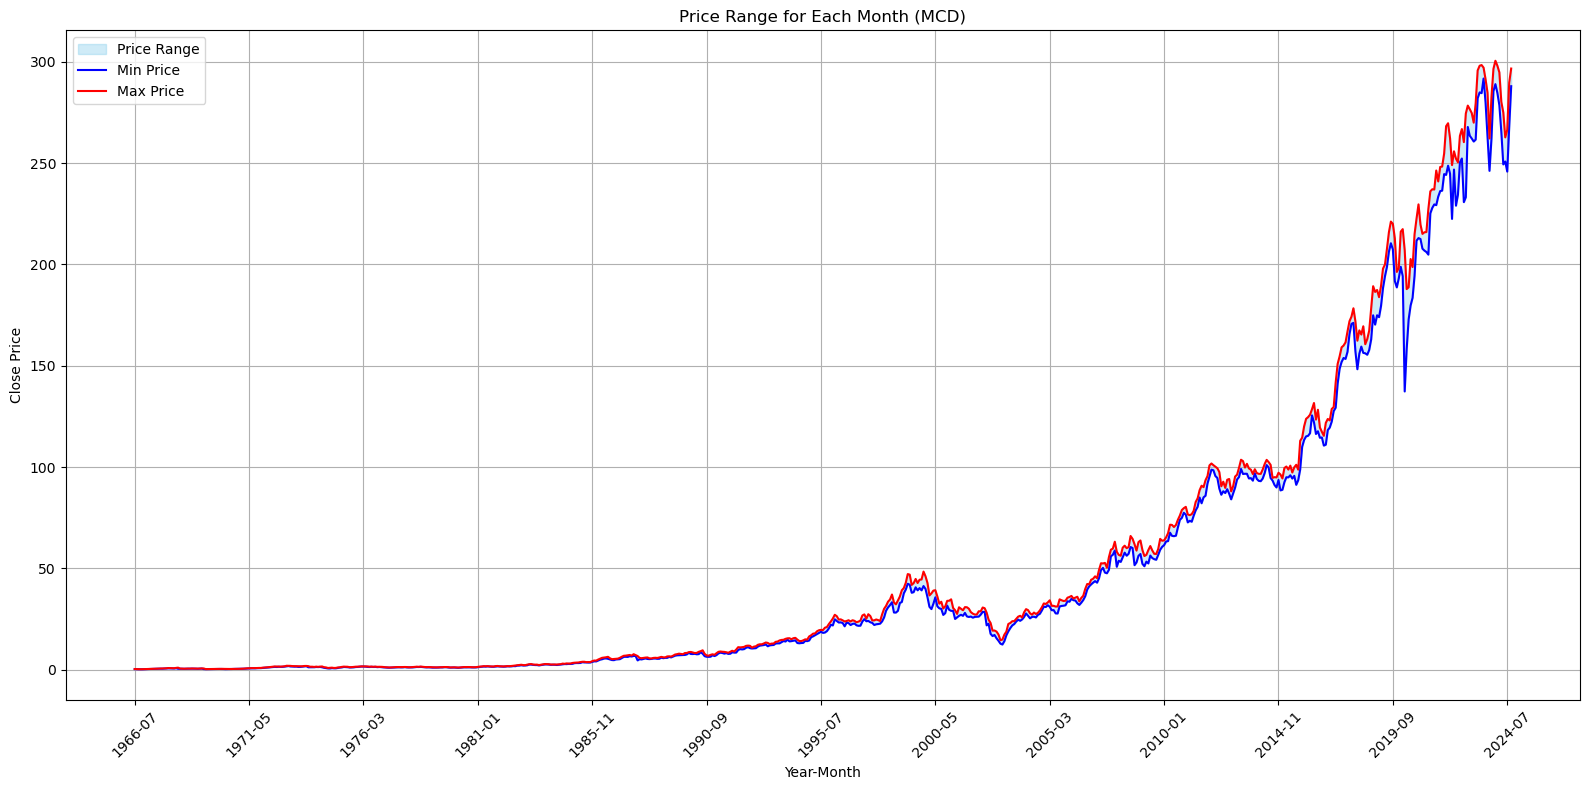

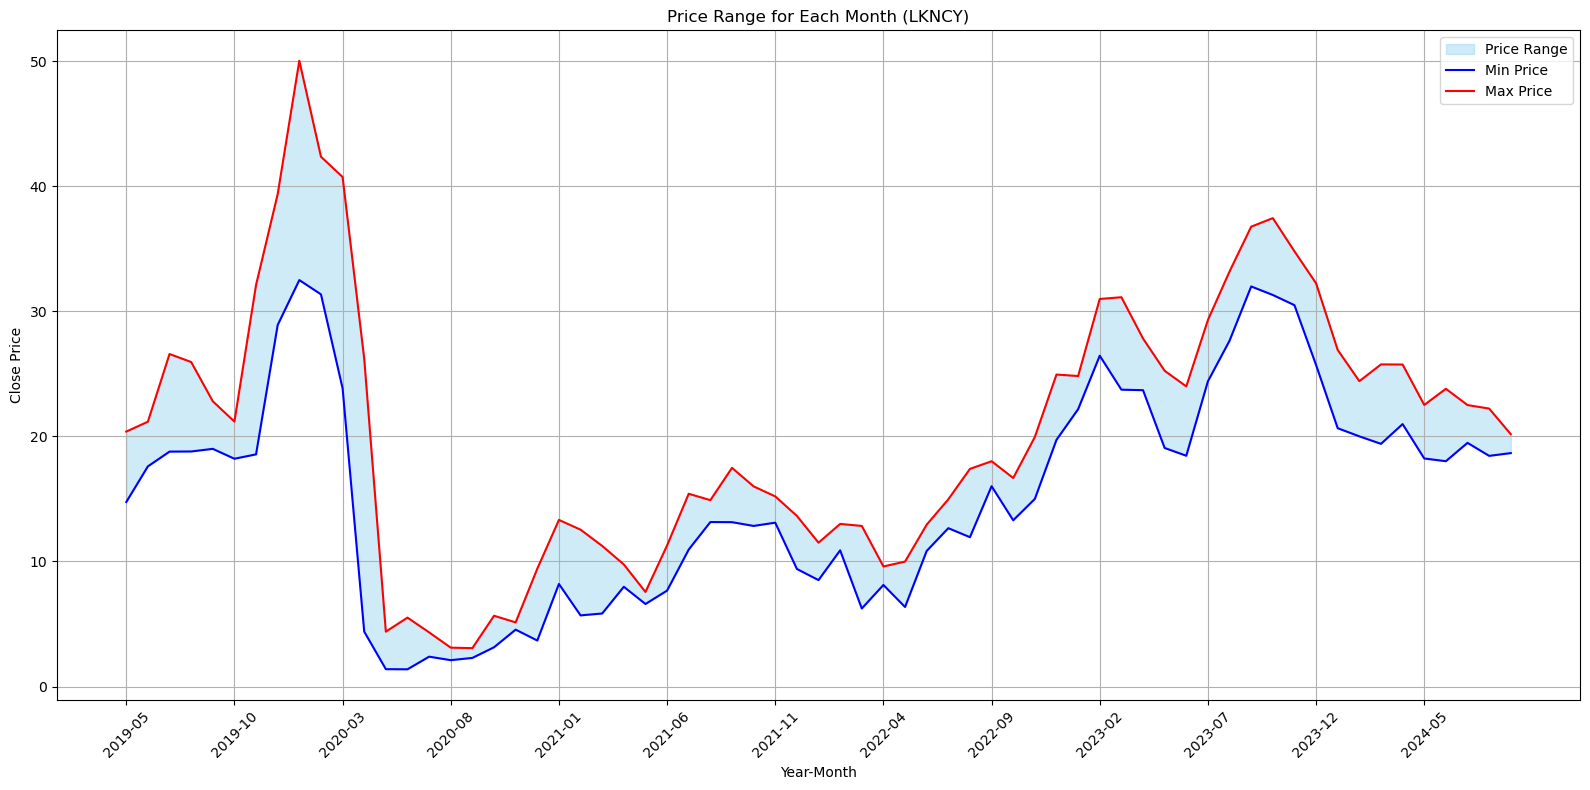

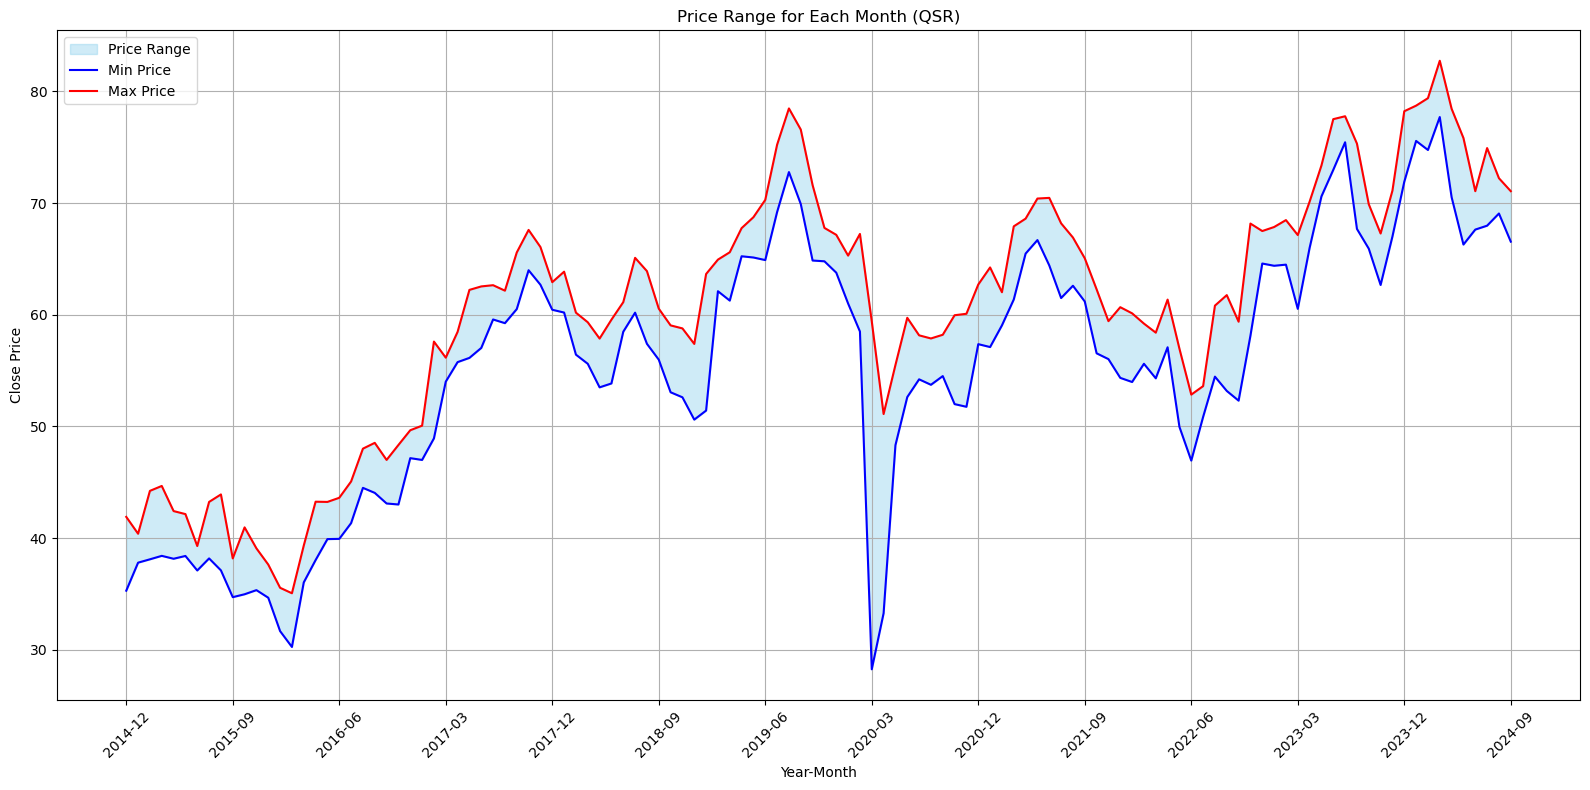

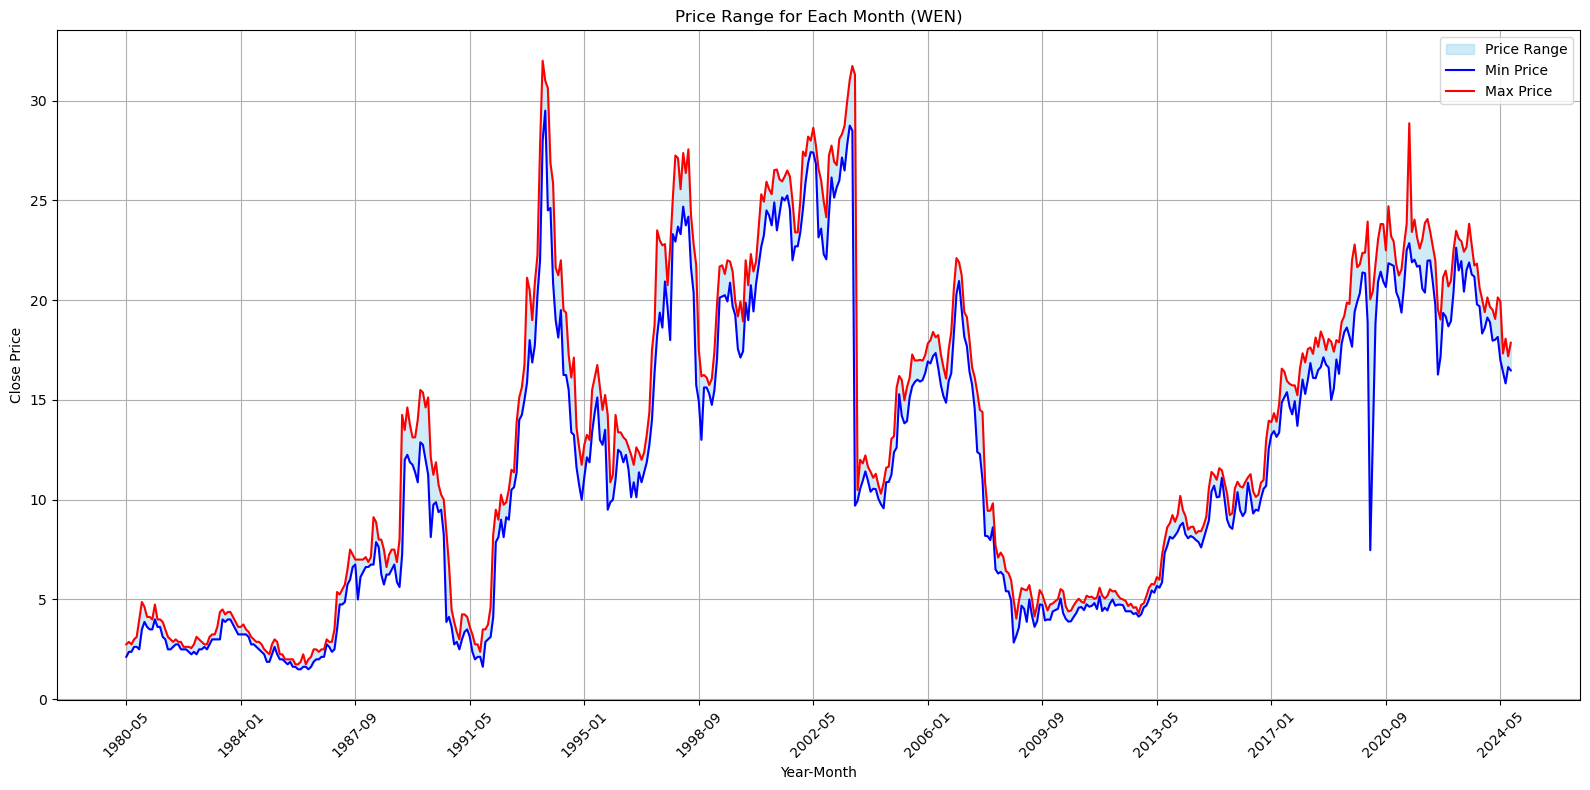

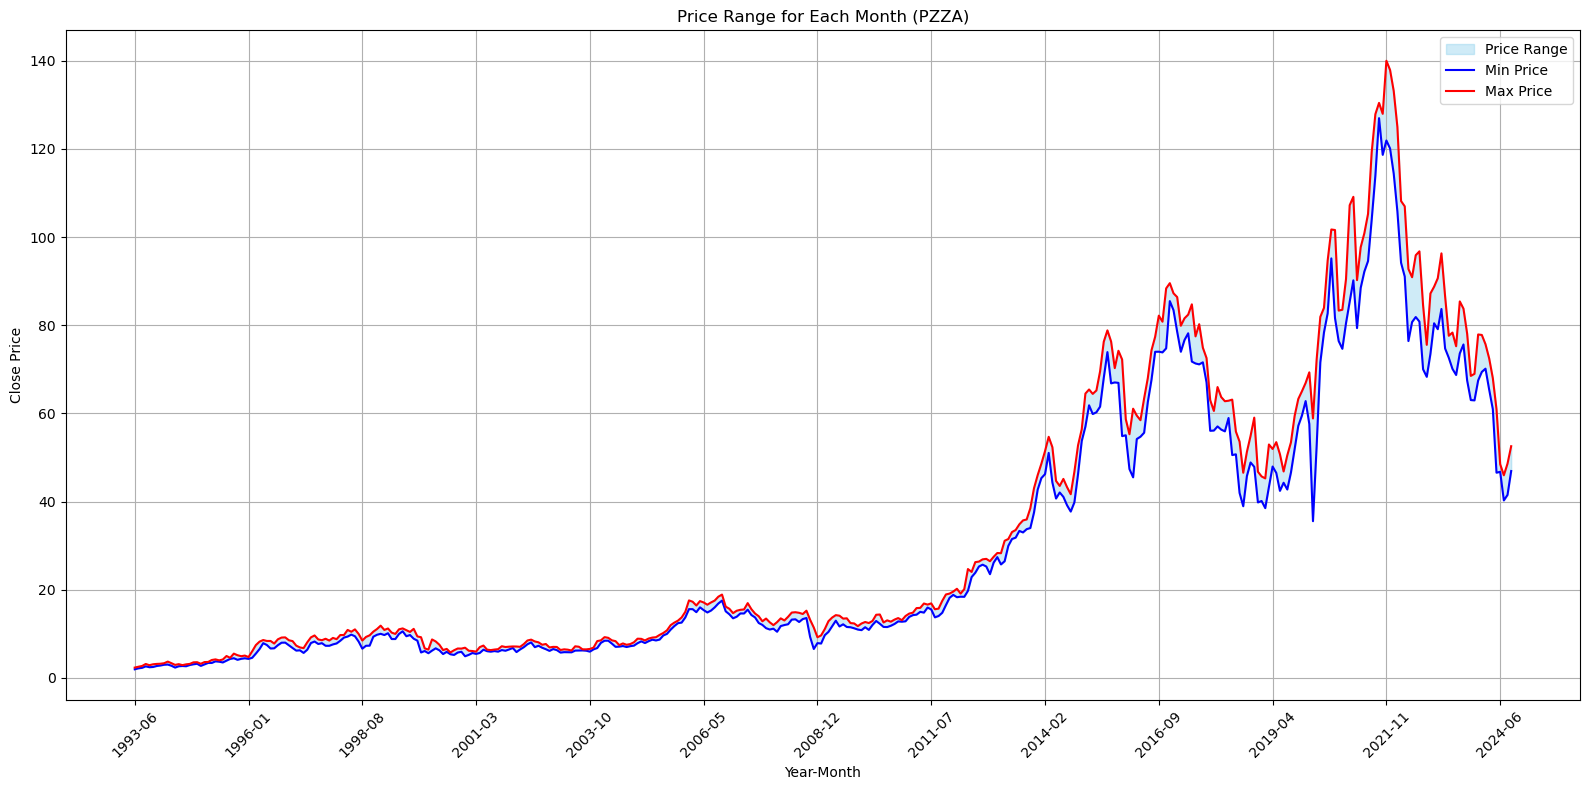

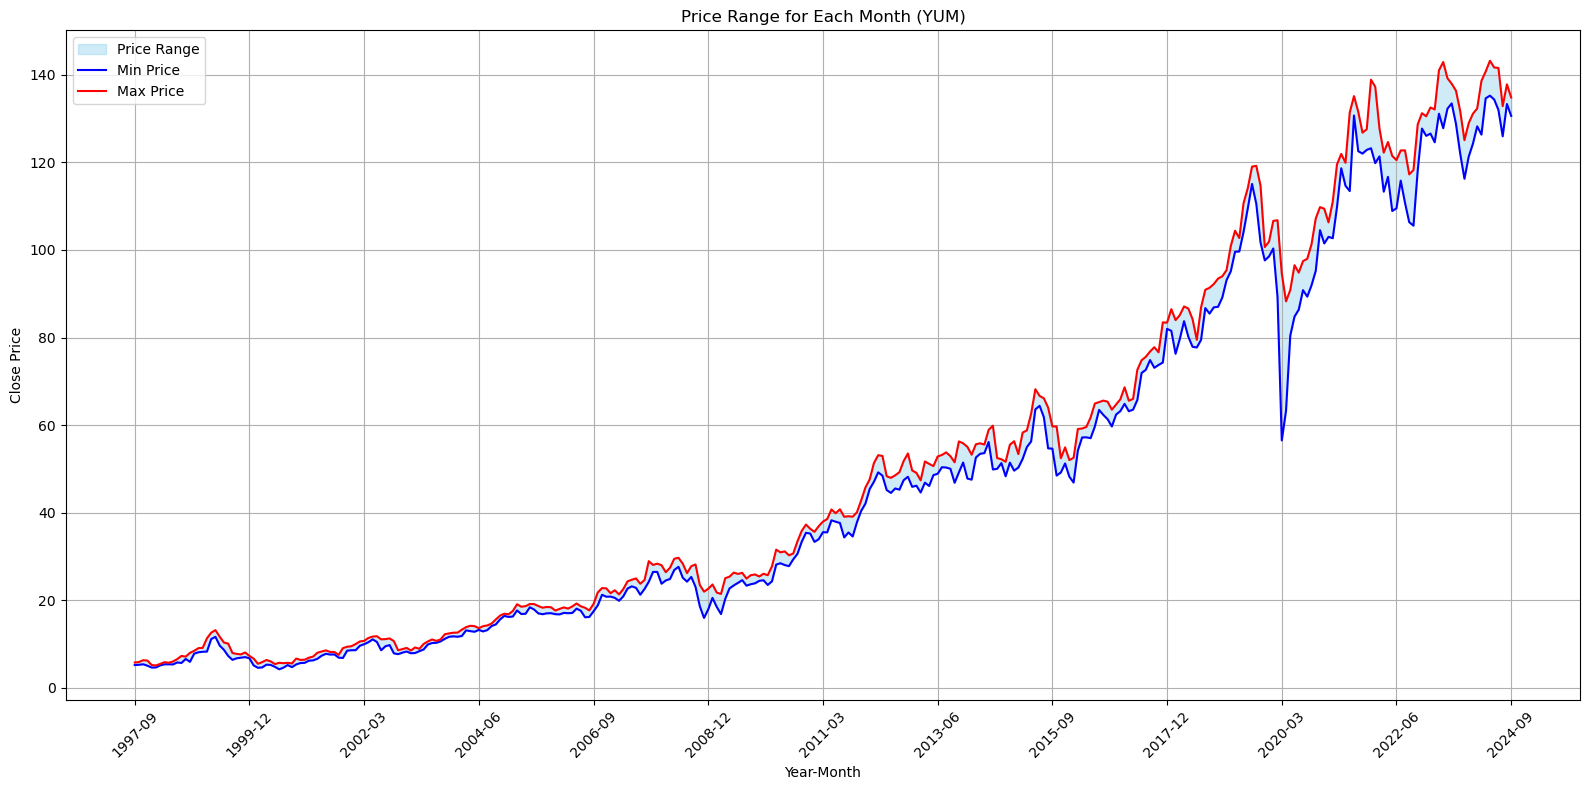

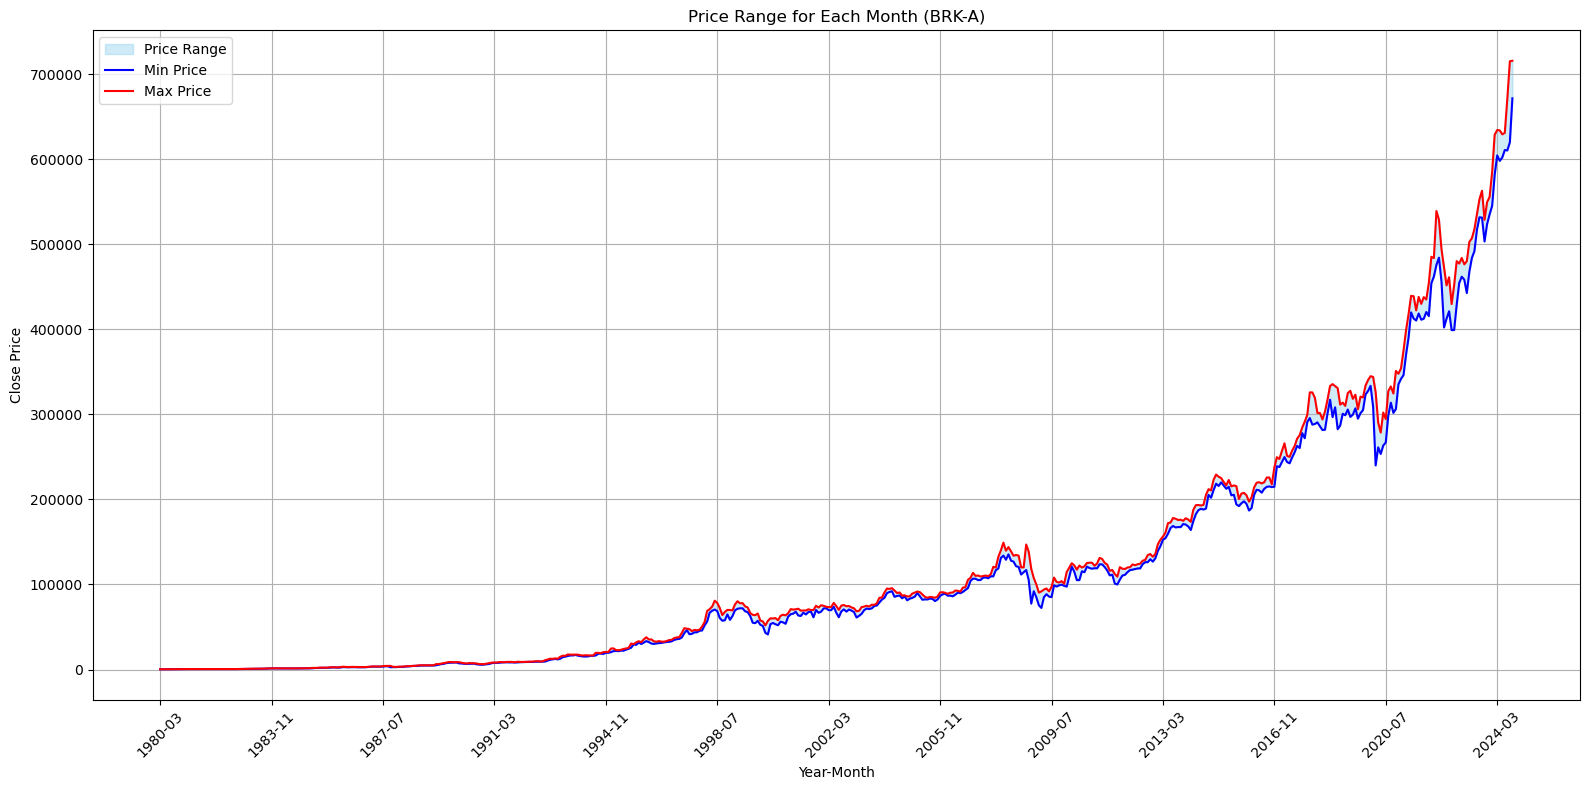

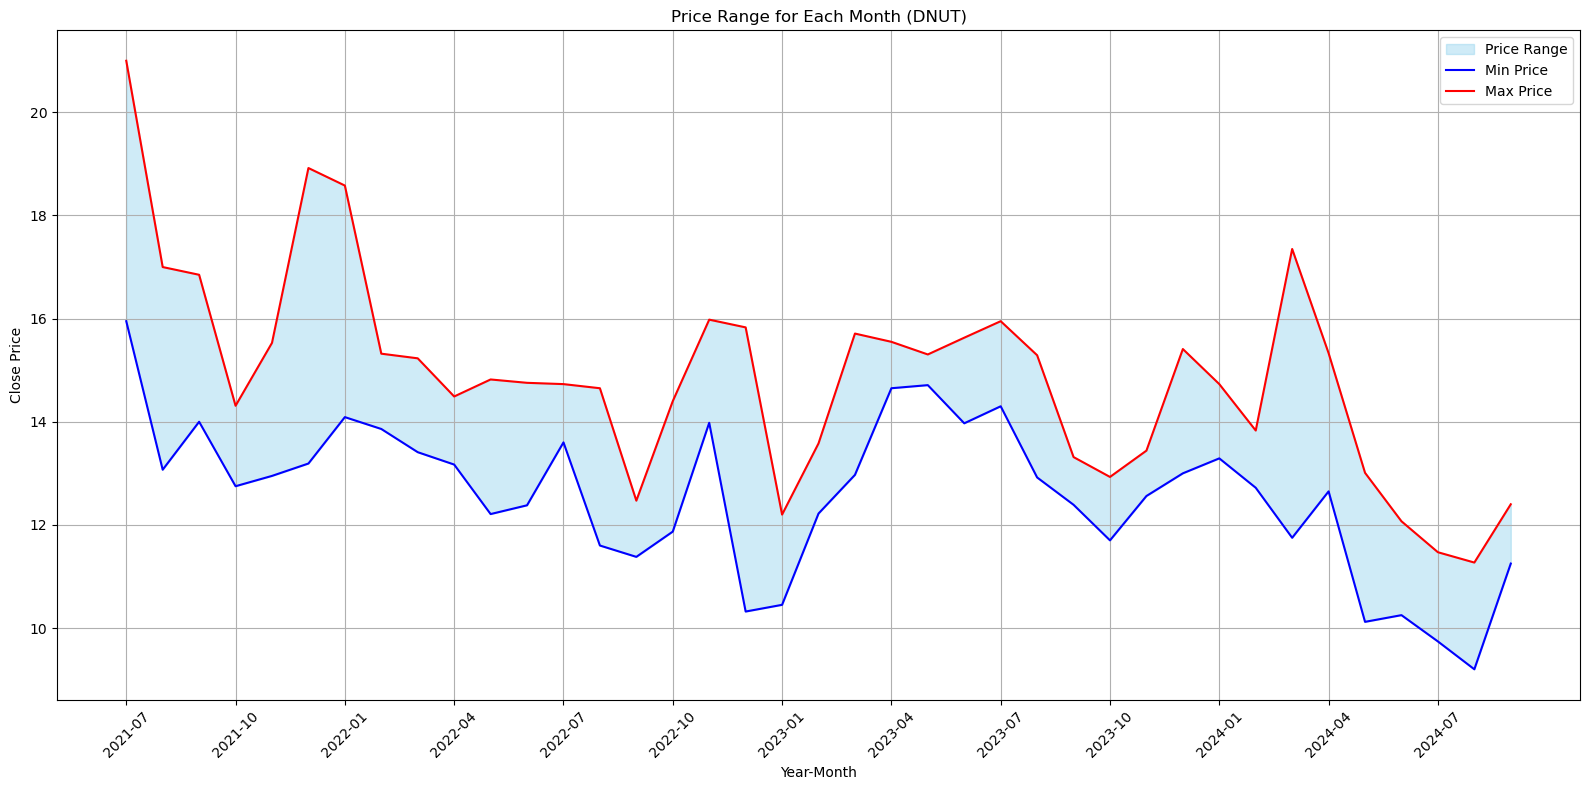

In [7]:
# 6

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():

    #Group by Year-Month
    data['YearMonth'] = data['Date'].dt.to_period('M')  # Year and Month combined for grouping

    # calculate range (min and max) of Close prices
    grouped_data = data.groupby('YearMonth')['Close'].agg(['min', 'max']).reset_index()

    # Plot the range for each month
    plt.figure(figsize=(16, 8))
    plt.fill_between(grouped_data['YearMonth'].astype(str), 
                     grouped_data['min'], 
                     grouped_data['max'], 
                     color='skyblue', alpha=0.4, label='Price Range')
    plt.plot(grouped_data['YearMonth'].astype(str), 
             grouped_data['min'], linestyle='-', color='blue', label='Min Price')
    plt.plot(grouped_data['YearMonth'].astype(str), 
             grouped_data['max'], linestyle='-', color='red', label='Max Price')

    # Chart details
    company_name = file_name.replace('.csv', '')  # Remove .csv extension for readability
    plt.title(f'Price Range for Each Month ({company_name})')
    plt.xlabel('Year-Month')
    plt.ylabel('Close Price')
    
    # Reduce the number of x-ticks dynamically
    step = max(1, len(grouped_data['YearMonth']) // 12)
    plt.xticks(ticks=range(0, len(grouped_data['YearMonth']), step), rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


Justify the chart selection:
The filled area makes the range of prices (min and max) for each month more visible, for easier observations of price fluctuations.
The line chart show the exact values for min and max prices.